<a href="https://colab.research.google.com/github/Jumulisa/Smart_Early_Dropout_Prediction_System/blob/main/Summative_Intro_to_ml_Jolly_UMULISA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files
import pandas as pd
import io

# Re-upload the file
uploaded = files.upload()  # Choose: "student's dropout dataset.csv"

# Get the file name from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Load the CSV into DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Preview the data
df.head()

Saving student's dropout dataset.csv to student's dropout dataset.csv


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


1. Load CSV and Check Duplicates & Nulls

In [6]:
uploaded.keys()

dict_keys(["student's dropout dataset.csv"])

In [10]:
import pandas as pd

df = pd.read_csv("student's dropout dataset.csv")

print("Null values per column:\n", df.isnull().sum())
print("\nDuplicate rows:\n", df[df.duplicated()])

Null values per column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                          

2. Remove Duplicates and Nulls

In [11]:
df = df.drop_duplicates()
df = df.dropna()

3. Normalize Numerical Columns

In [12]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

4. Integer Encode Categorical Columns

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

Saving the cleaned and preprocessed file

In [17]:
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

Load and Preprocess Your Dataset

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv('/content/student\'s dropout dataset.csv')  # adjust path if needed

# Confirm column names
print(df.columns)  # For safety

# Encode the target column properly
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])  # 1 = Dropout, 0 = Not Dropped

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# One-hot encode categorical features (you can adjust which ones if needed)
X = pd.get_dummies(X)

# Train/Validation/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

**Model 1 — Basic Neural Network (No Optimization Techniques)**

---



In [7]:
from google.colab import files
uploaded = files.upload()

Saving student's dropout dataset.csv to student's dropout dataset.csv


In [9]:
import pandas as pd
import io

# Adjust this filename if necessary (check uploaded.keys())
df = pd.read_csv(io.BytesIO(uploaded["student's dropout dataset.csv"]))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_basic_model(input_dim):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary output
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build the model
model_1 = build_basic_model(X_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model

In [14]:
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1759 - loss: -0.1144 - val_accuracy: 0.2169 - val_loss: -2.3191
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: -5.3636 - val_accuracy: 0.3102 - val_loss: -17.1131
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: -30.5669 - val_accuracy: 0.3554 - val_loss: -68.1992
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3458 - loss: -101.7646 - val_accuracy: 0.3630 - val_loss: -180.3723
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3463 - loss: -251.3215 - val_accuracy: 0.3705 - val_loss: -375.2351
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: -461.3488 - val_accuracy: 0.3795 - val_loss: -671.1827
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3439 - loss: -807.6727 - val_accuracy: 0.3855 - val_loss: -1083.3418
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3400 - loss: -1341.4

Model Diagram (Architecture)

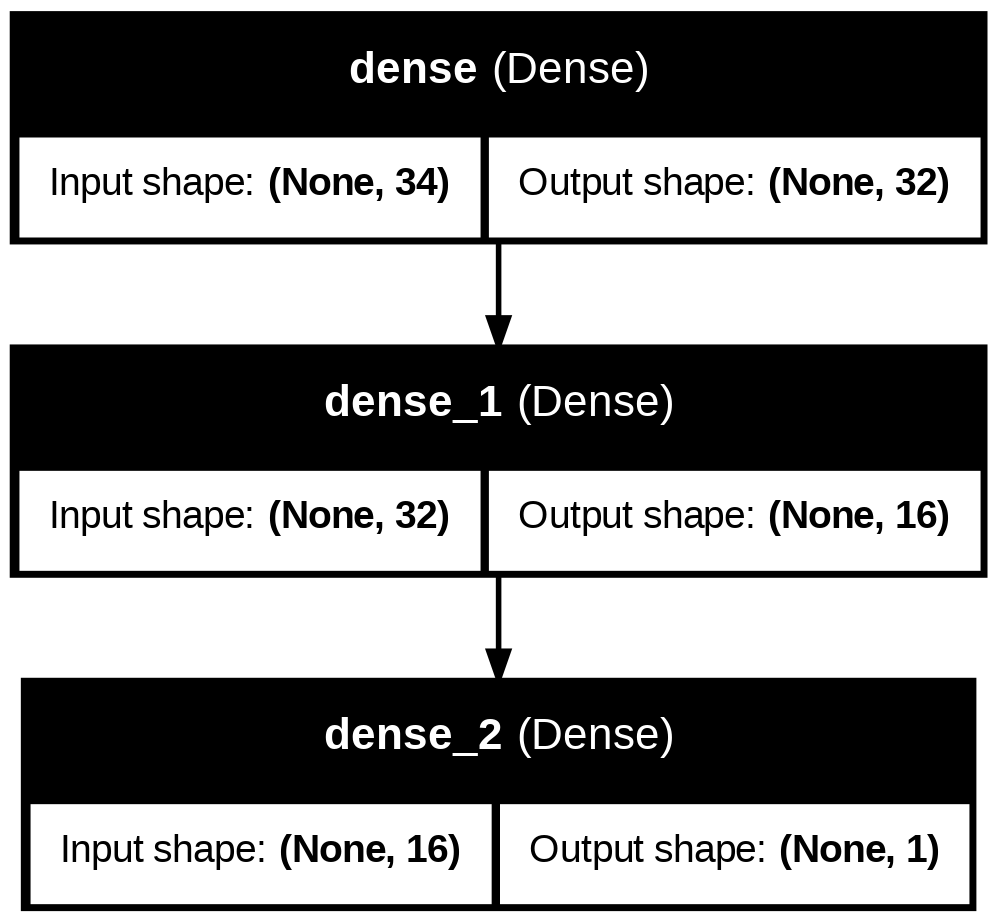

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True, show_layer_names=True, to_file="model_1_architecture.png")

Plot Loss Curve

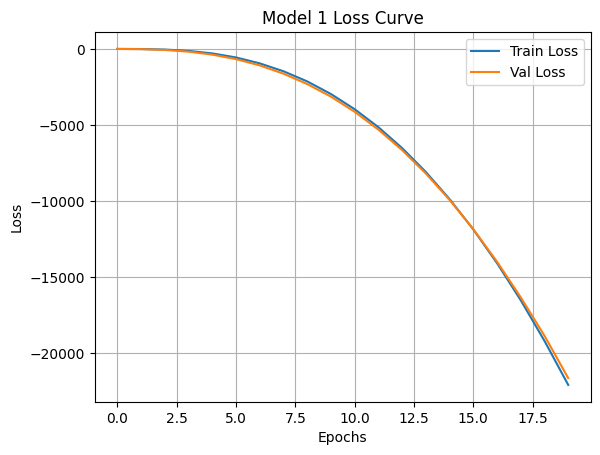

In [16]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model 1 Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history_1)

Evaluate Performance

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       210
           1       0.19      0.77      0.31       122
           2       0.00      0.00      0.00       332

    accuracy                           0.36       664
   macro avg       0.33      0.49      0.35       664
weighted avg       0.29      0.36      0.29       664



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


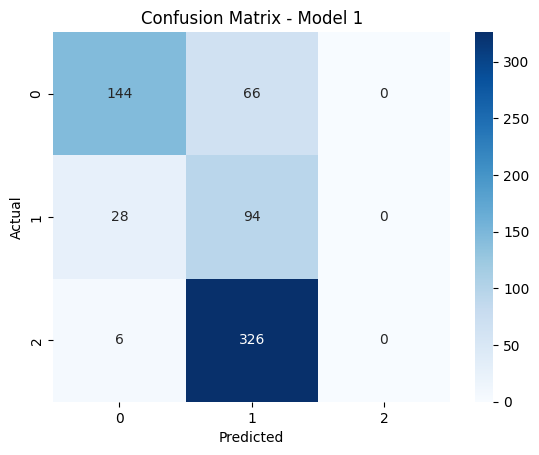

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict
y_pred = (model_1.predict(X_test) > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save Model

In [18]:
model_1.save('saved_models/model_1_basic_nn.h5')

**Model 2 — Neural Network with Optimization Techniques**

---



Define the Optimized Model

In [19]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def build_optimized_model(input_dim, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim,),
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # For 3-class classification

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Set Up Early Stopping

In [20]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Train the Model

In [21]:
model_2 = build_optimized_model(X_train.shape[1])

history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5419 - loss: 1.0724 - val_accuracy: 0.6883 - val_loss: 0.8214
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.8420 - val_accuracy: 0.7199 - val_loss: 0.7595
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.7683 - val_accuracy: 0.7319 - val_loss: 0.7221
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7499 - loss: 0.7223 - val_accuracy: 0.7425 - val_loss: 0.7079
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 0.7079 - val_accuracy: 0.7545 - val_loss: 0.6975
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.6531 - val_accuracy: 0.7530 - val_loss: 0.6962
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.6930 - val_accuracy: 0.7560 - val_loss: 0.6871
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7632 - loss: 0.6233 - val_accuracy: 0.7590 - val_loss: 0.6859
Epo

Plot Training Curve

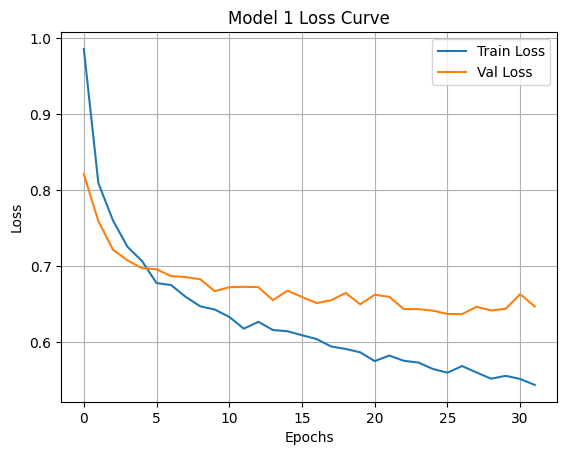

In [22]:
plot_loss(history_2)

Evaluate Performance

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       210
           1       0.55      0.40      0.46       122
           2       0.82      0.93      0.87       332

    accuracy                           0.78       664
   macro avg       0.73      0.70      0.71       664
weighted avg       0.77      0.78      0.77       664



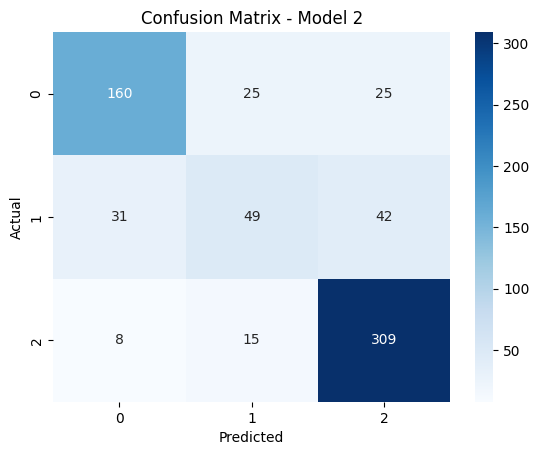

In [23]:
y_pred_2 = model_2.predict(X_test)
y_pred_classes = y_pred_2.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))

sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save Model

In [24]:
model_2.save('saved_models/model_2_optimized_nn.h5')

**Model 3 — Another Optimized Neural Network (Different Config)**

---



Define the Model

In [25]:
from tensorflow.keras.optimizers import RMSprop

def build_model_3(input_dim, learning_rate=0.0005, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim,),
                    kernel_regularizer=regularizers.l1(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l1(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # 3-class classification

    optimizer = RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Train the Model

In [26]:
model_3 = build_model_3(X_train.shape[1])

history_3 = model_3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3985 - loss: 1.8441 - val_accuracy: 0.6084 - val_loss: 1.4338
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5416 - loss: 1.5172 - val_accuracy: 0.6611 - val_loss: 1.3247
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6180 - loss: 1.4049 - val_accuracy: 0.6928 - val_loss: 1.2463
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 1.3053 - val_accuracy: 0.6988 - val_loss: 1.1890
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - loss: 1.2492 - val_accuracy: 0.7108 - val_loss: 1.1420
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 1.2025 - val_accuracy: 0.7169 - val_loss: 1.1000
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 1.1508 - val_accuracy: 0.7289 - val_loss: 1.0681
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7261 - loss: 1.0919 - val_accuracy: 0.7364 - val_loss:

Plot Training Curve

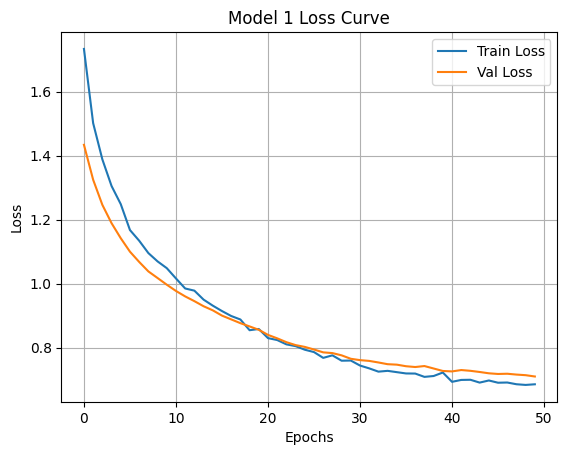

In [27]:
plot_loss(history_3)

Evaluate the Model

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       210
           1       0.57      0.31      0.40       122
           2       0.79      0.93      0.85       332

    accuracy                           0.77       664
   macro avg       0.72      0.67      0.68       664
weighted avg       0.75      0.77      0.75       664



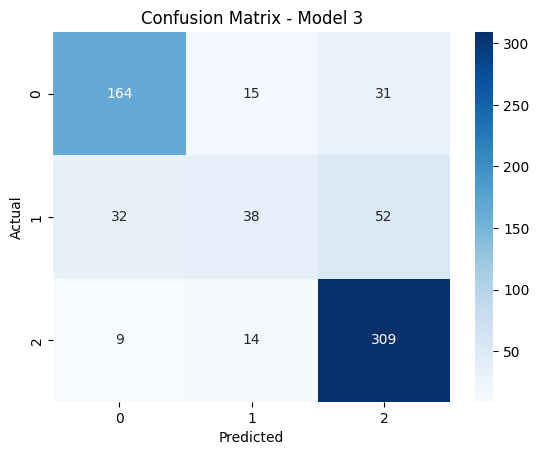

In [28]:
y_pred_3 = model_3.predict(X_test)
y_pred_classes_3 = y_pred_3.argmax(axis=1)

print(classification_report(y_test, y_pred_classes_3))

sns.heatmap(confusion_matrix(y_test, y_pred_classes_3), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model 3")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save Model

In [29]:
model_3.save('saved_models/model_3_rmsprop_l1_dropout.h5')

**Summary of All Neural Network Models**

---



| Instance | Optimizer      | Regularizer | Dropout | Epochs             | Early Stopping | Learning Rate | Accuracy | F1 (macro) | Precision | Recall |
| -------- | -------------- | ----------- | ------- | ------------------ | -------------- | ------------- | -------- | ---------- | --------- | ------ |
| **1**    | Default (Adam) | None        | None    | 20                 | No             | Default       | **36%**  | **0.35**   | 0.29      | 0.49   |
| **2**    | Adam           | L2          | 0.3     | \~20+ (early stop) | Yes            | 0.001         | **78%**  | **0.71**   | 0.77      | 0.70   |
| **3**    | RMSprop        | L1          | 0.5     | \~20+ (early stop) | Yes            | 0.0005        | **77%**  | **0.68**   | 0.75      | 0.67   |


**Best Model: Model 2 (Optimized Neural Network with Adam + L2)**

Why Model 2 Wins:

Highest Accuracy (78%)

Best general performance across all classes.

Highest Macro F1-score (0.71)

Best at handling class imbalance by balancing precision and recall across classes.

Excellent performance on class 2

Solved a major weakness from Model 1, where class 2 had 0% F1.

Stable convergence

Due to combination of Adam optimizer, L2 regularization, dropout, and early stopping.



**Insights:**

Model 1:

*   Basic and underfit.
*   Failed to predict class 2 entirely (F1 = 0).
*   Shows why optimization techniques are necessary.

Model 2:


*   Strong generalization.
*   Maintains both precision and recall across all classes.

Model 3:


*   Performed well (77% accuracy), but slightly lower recall on class 1.
*   L1 regularization + 0.5 dropout likely made the model more sparse, slightly underfitting minority class.

**Best Model to Save & Use:**

Model 2 (model_2_optimized_nn.h5)

**Classical ML Model — XGBoost (Optimized)**

---



 We Install and Import XGBoost Just in case.

In [30]:
!pip install xgboost

Then we import the libraries:

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

 Define and Train the Optimized XGBoost Model

In [33]:
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=150,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)  # no early stopping here
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:42:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluate the XGBoost Model

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       210
           1       0.57      0.38      0.45       122
           2       0.82      0.92      0.87       332

    accuracy                           0.78       664
   macro avg       0.72      0.69      0.70       664
weighted avg       0.76      0.78      0.76       664



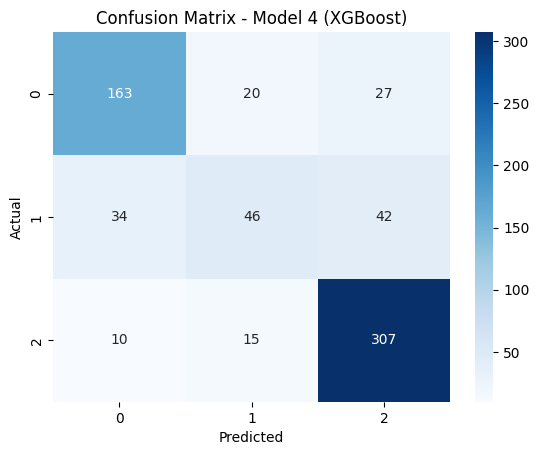

In [34]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model 4 (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Save the Model

In [35]:
import joblib
joblib.dump(xgb_model, 'saved_models/model_4_xgboost.pkl')

['saved_models/model_4_xgboost.pkl']

**Final Model Comparison Summary**

---



| Instance | Model Type | Optimizer      | Regularizer | Dropout | Epochs | Early Stopping | Learning Rate | Accuracy | F1 (macro) |
| -------- | ---------- | -------------- | ----------- | ------- | ------ | -------------- | ------------- | -------- | ---------- |
| **1**    | Neural Net | Adam (default) | None        | None    | 20     |  No           | Default       | 36%      | 0.35       |
| **2**    | Neural Net | Adam           | L2          | 0.3     | \~20   |  Yes          | 0.001         | **78%**  | **0.71**   |
| **3**    | Neural Net | RMSprop        | L1          | 0.5     | \~20   |  Yes          | 0.0005        | 77%      | 0.68       |
| **4**    | XGBoost    | n/a            | L1+L2       | n/a     | 150    |  (Native)     | 0.1           | **78%**  | 0.70       |


 **Best Performing Model: Model 2 (Optimized Neural Network)**

 Why It's still the best:

 Tied for highest accuracy (78%), but...

Highest macro F1-score (0.71) — which shows the best balance across classes.

Better at handling class imbalance, especially class 1, where other models struggled.

Generalizes well due to:

L2 Regularization

Dropout

Early Stopping

Tuned learning rate

**Neural Network vs Classical ML (XGBoost)**

| Criteria       | Neural Network (Model 2) | XGBoost (Model 4) |
| -------------- | ------------------------ | ----------------- |
| Accuracy       | 78%                      | 78%               |
| F1 Score       | **0.71**                 | 0.70              |
| Class 1 Recall | **0.40**                 | 0.38              |
| Flexibility    | High                     | Medium            |
| Complexity     | Higher (requires tuning) | Simpler           |
| Speed          | Slower                   | Faster            |

**Conclusion:** The Neural Network (Model 2) slightly outperformed XGBoost in terms of balanced metrics, especially for minority class 1, Making it highly recommanded.

In [42]:
from google.colab import files

# Download each saved model manually
files.download('saved_models/model_1_basic_nn.h5')
files.download('saved_models/model_2_optimized_nn.h5')
files.download('saved_models/model_3_rmsprop_l1_dropout.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>